In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data_types = {
    'Energy': float,
    'Wavelength': float
    # Add more columns and their corresponding data types if needed
}

led_370E = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/370E.csv', dtype=data_types)
led_405E = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/405E.csv', dtype=data_types)
led_465E = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/465E.csv', dtype=data_types)
led_528HP = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/528EHP.csv', dtype=data_types)
led_591E = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/591E.csv', dtype=data_types)
led_631E = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/631E.csv', dtype=data_types)
led_780E = pd.read_csv('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Raw_Data/780E.csv', dtype=data_types)


In [36]:
leds = [led_370E, led_405E, led_465E, led_528HP, led_591E, led_631E, led_780E]

for i in leds:
    i['Wavelength'] = i['Wavelength'] / 1000


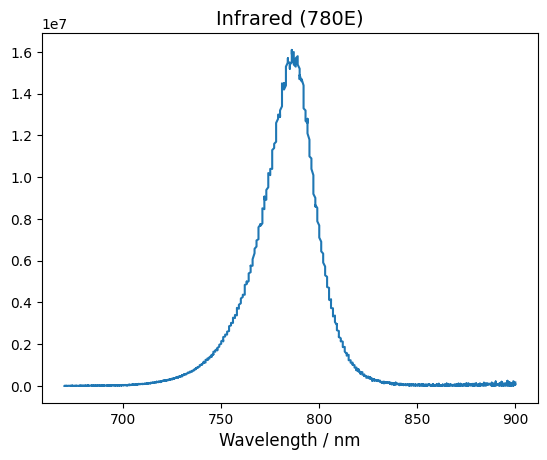

In [66]:
spectra_df = led_780E

title = 'Infrared (780E)'

# 'Orange (591E)'   : led_631E,
# 'Purple (405E)'   : led_405E,
# 'Blue (465E)'     : led_465E,
# 'Green (528HP)'   : led_528HP,
# 'Red (631E)'      : led_631E,
# 'Infrared (780E)' : led_780E

clip = (1800, 3300)

# Plot the spectrum
plt.plot(spectra_df['Wavelength'][clip[0]:clip[1]], spectra_df['Energy'][clip[0]:clip[1]])
plt.xlabel('Wavelength / nm', fontsize=12)
plt.title(title, fontsize=14)
plt.show()

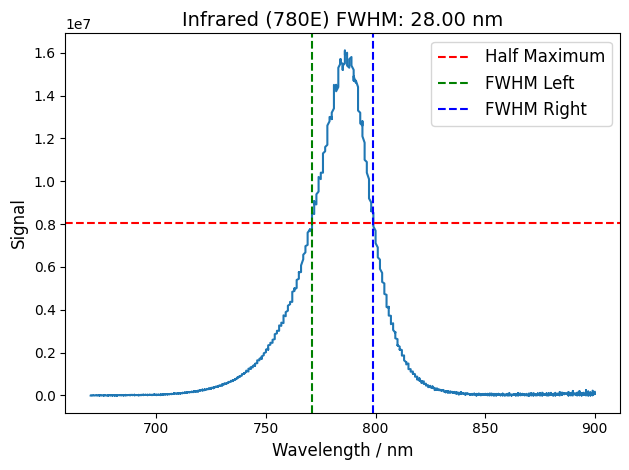

FWHM: 28.00 nm


In [67]:
fig = plt.figure(layout='tight')

# Find the maximum value and its index
max_index = spectra_df['Energy'].idxmax()
max_value = spectra_df.loc[max_index, 'Energy']

# Determine half-maximum value
half_max_value = max_value / 2

# Find points nearest to the half-maximum value on each side of the peak
left_idx = np.argmin(np.abs(spectra_df.loc[:max_index, 'Energy'] - half_max_value))
right_idx = np.argmin(np.abs(spectra_df.loc[max_index:, 'Energy'] - half_max_value)) + max_index

# Calculate FWHM
fwhm = spectra_df.loc[right_idx, 'Wavelength'] - spectra_df.loc[left_idx, 'Wavelength']

# Plotting the spectrum with FWHM
plt.plot(spectra_df['Wavelength'][clip[0]:clip[1]], spectra_df['Energy'][clip[0]:clip[1]])
plt.axhline(y=half_max_value, color='red', linestyle='--', label='Half Maximum')
plt.axvline(x=spectra_df.loc[left_idx, 'Wavelength'], color='green', linestyle='--', label='FWHM Left')
plt.axvline(x=spectra_df.loc[right_idx, 'Wavelength'], color='blue', linestyle='--', label='FWHM Right')

plt.title(f'{title} FWHM: {fwhm:.2f} nm', fontsize=14)
plt.xlabel('Wavelength / nm', fontsize=12)
plt.ylabel('Signal', fontsize=12)

plt.legend(fontsize=12)

plt.savefig(f'/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Spectra/{title}_Spectra.png', dpi=300)

plt.show()

print(f"FWHM: {fwhm:.2f} nm")
